In [1]:
# external pacakges that we need 
from time import time
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

# my own package
from continuous_model.simulator import *
from continuous_model.plot_model import plot_field

In [2]:
# Define several parameters
Ms = 3.84e5
A = 8.78e-12  # A/m
D = 1.58e-3
B = 0.1
mu0 = 4 * np.pi * 1e-7

In [3]:
initial_state = np.load('./normalised_m/m_is_skyrmion.npy')

nx = initial_state.shape[0]
ny = initial_state.shape[1]
nz = initial_state.shape[2]


my_cool_mesh = RectangularMesh(nx=nx, ny=ny, nz=nz, units=5e-9)
my_cool_m = m_Field(my_cool_mesh, Ms, initial_state)

If you want to take a look at the initial state of is_skyrmion_cuboid

In [4]:
initial_E = Exchange(A=A).energy(my_cool_m) + DMI(D=D).energy(my_cool_m) + Zeeman(H=[0, 0, B/mu0]).energy(my_cool_m)
print(initial_E)

3.523452520162635e-18


In [5]:
# initialise a simulator
my_cool_simulator = Simulator(A, D, [0, 0, B/mu0], 0, 0, 0)

start = time()
final_state, E_final = my_cool_simulator.compute_minimum(my_cool_m, 0.001,  20000000, 1000000, './postprocessing/iterations/')
print("Execution time of MonteCarlo simulation for skyrmion_cuboid: {}".format(time()-start))
print("The total energy of the system in the final magnetisation state : ", E_final)

K, u are ignored
Execution time of MonteCarlo simulation for skyrmion_cuboid: 6367.69370508194
The total energy of the system in the final magnetisation state :  -2.1063762609860416e-17


In [6]:
print("The final state: \n", final_state)

The final state: 
 [[[[-0.54103018  0.82639935 -0.15604633]
   [-0.8217634   0.54795257 -0.15637422]]

  [[-0.49908276  0.86271249  0.08150806]
   [-0.78578813  0.60960782  0.10447645]]

  [[-0.34115773  0.90423754  0.25683823]
   [-0.64755238  0.71006323  0.27656125]]

  ...

  [[ 0.65396871  0.70440011  0.27594458]
   [ 0.34909199  0.90150745  0.25577159]]

  [[ 0.79121789  0.60307885  0.10134175]
   [ 0.5063119   0.85877369  0.07846027]]

  [[ 0.82513478  0.54127361 -0.16178838]
   [ 0.54638492  0.82177179 -0.16172397]]]


 [[[-0.60301593  0.79070284  0.10564469]
   [-0.85842116  0.50623536  0.08269743]]

  [[-0.52138636  0.77976773  0.34658124]
   [-0.7753227   0.52825949  0.34614536]]

  [[-0.35793426  0.77886726  0.51502317]
   [-0.62156681  0.58758843  0.51806809]]

  ...

  [[ 0.62768307  0.582655    0.51626264]
   [ 0.36534071  0.77663134  0.51319579]]

  [[ 0.78069708  0.52308661  0.3418954 ]
   [ 0.52783015  0.77749754  0.34189606]]

  [[ 0.86184758  0.50148117  0.07573229]


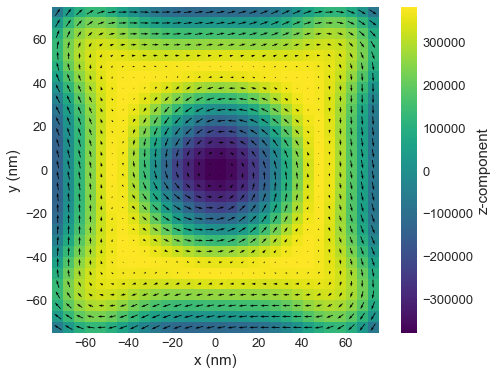

In [7]:
plot_field(my_cool_mesh, my_cool_m, 'z', value=10e-9)

### Validation
You can also validate the result you just get with a existing python package called Ubermag.

In [8]:
# Test 1
region = df.Region(p1=(-75e-9, -75e-9, 0), p2=(75e-9, 75e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

initial_state = np.load('./normalised_m/m_is_skyrmion.npy')
m = df.Field(mesh, dim=3, value=initial_state , norm=Ms)

system = mm.System(name='uber_relax_skyrmion')
B = 0.1

system.m = m

system.energy = (mm.Exchange(A=A) + 
                 mm.DMI(D=D, crystalclass='T') +
                 mm.Zeeman(H=(0, 0, B/mu0))
                )
E = oc.compute(system.energy.energy, system)
print(E)

Running OOMMF (ExeOOMMFRunner)[2022/09/08 00:15]... (1.9 s)
3.52345252016e-18


## Relax the magnetic system

In [9]:
md = oc.MinDriver()
md.drive(system)
E_minimum = oc.compute(system.energy.energy, system)
print(E_minimum)

Running OOMMF (ExeOOMMFRunner)[2022/09/08 00:15]... (1.4 s)
Running OOMMF (ExeOOMMFRunner)[2022/09/08 00:15]... (1.0 s)
-2.10671824364e-17


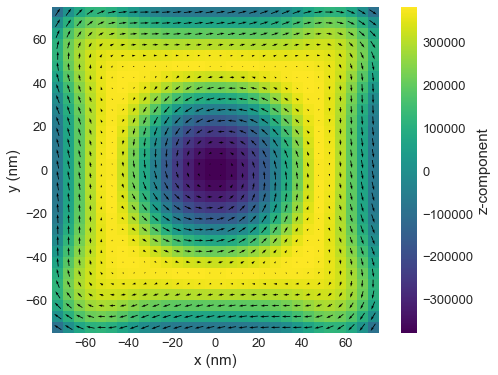

In [10]:
m.plane(z=10e-9).mpl() # no demag cuboid

In [22]:
print(system.m.array / Ms)

[[[[-0.53295555  0.81236074 -0.2367032 ]
   [-0.81236091  0.5329553  -0.23670318]]

  [[-0.52073498  0.85371378  0.0028033 ]
   [-0.80579437  0.59157333  0.02713723]]

  [[-0.38718392  0.9024706   0.18877347]
   [-0.6923341   0.69012853  0.21070383]]

  ...

  [[ 0.6923341   0.69012853  0.21070383]
   [ 0.38718392  0.9024706   0.18877347]]

  [[ 0.80579437  0.59157333  0.02713723]
   [ 0.52073498  0.85371378  0.0028033 ]]

  [[ 0.81236091  0.5329553  -0.23670318]
   [ 0.53295555  0.81236074 -0.2367032 ]]]


 [[[-0.59157355  0.80579421  0.02713716]
   [-0.85371393  0.52073473  0.00280324]]

  [[-0.53799889  0.79807047  0.27136823]
   [-0.79807062  0.53799866  0.27136823]]

  [[-0.39665716  0.79871696  0.45245365]
   [-0.66538389  0.59138478  0.45555276]]

  ...

  [[ 0.66538389  0.59138478  0.45555276]
   [ 0.39665716  0.79871696  0.45245365]]

  [[ 0.79807062  0.53799866  0.27136823]
   [ 0.53799889  0.79807047  0.27136823]]

  [[ 0.85371393  0.52073473  0.00280324]
   [ 0.59157355  0.

In [21]:
unknow_state = np.load('./normalised_m/fs_skyrmion_cuboid.npy')

In [18]:
print(unknow_state)

[[[[-0.54849098  0.82158275 -0.15543304]
   [-0.82675753  0.54076478 -0.15506589]]

  [[-0.50759235  0.85750538  0.08387204]
   [-0.79141465  0.60180407  0.10721345]]

  [[-0.35234958  0.89919514  0.25941832]
   [-0.65595499  0.70107277  0.27967844]]

  ...

  [[ 0.666658    0.69739792  0.26306511]
   [ 0.36279553  0.89989229  0.24201915]]

  [[ 0.79641048  0.5984043   0.08742217]
   [ 0.51237923  0.85638607  0.06379979]]

  [[ 0.8242995   0.53818858 -0.1757367 ]
   [ 0.54580227  0.81916828 -0.17624758]]]


 [[[-0.60916718  0.78599164  0.10551063]
   [-0.86222897  0.4997074   0.08278713]]

  [[-0.52844736  0.77460749  0.34745736]
   [-0.77970613  0.52075724  0.34766398]]

  [[-0.36774496  0.7730835   0.51682255]
   [-0.62859448  0.57854255  0.51976677]]

  ...

  [[ 0.63914983  0.58088865  0.50403955]
   [ 0.37646357  0.77927457  0.50100531]]

  [[ 0.78562148  0.52440599  0.32832493]
   [ 0.53209251  0.78044991  0.3282918 ]]

  [[ 0.86121354  0.50442483  0.06218384]
   [ 0.60569554  0.

if you want to compare our final state from our program and ubermag.

In [34]:
np.allclose(unknow_state, system.m.array / Ms, atol=0.16)

True